DOWNLOAD THE DATASET FROM THE KAGGLE 

In [1]:
import os

os.environ['KAGGLE_USERNAME'] = "navinyabharathir" # username from the json file
os.environ['KAGGLE_KEY'] = "e86f4a94dc949f12b25c6f7089cd91dd" # key from the json file

In [2]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 597M/612M [00:03<00:00, 137MB/s]
100% 612M/612M [00:03<00:00, 169MB/s]


In [6]:
from zipfile import ZipFile
Dataset = "/content/gtsrb-german-traffic-sign.zip"
with ZipFile(Dataset , 'r') as sip:
  sip.extractall('/content/traffic')
  print('Done')

Done


IMPORT LIBRARIES

In [7]:
import numpy as np # linear algebra
import pandas as pd 

In [8]:
import os
for dirname, _, filenames in os.walk('/content/traffic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/traffic/train/25/00025_00037_00008.png
/content/traffic/train/25/00025_00039_00018.png
/content/traffic/train/25/00025_00025_00020.png
/content/traffic/train/25/00025_00005_00021.png
/content/traffic/train/25/00025_00028_00006.png
/content/traffic/train/25/00025_00049_00002.png
/content/traffic/train/25/00025_00047_00014.png
/content/traffic/train/25/00025_00029_00006.png
/content/traffic/train/25/00025_00048_00012.png
/content/traffic/train/25/00025_00039_00025.png
/content/traffic/train/25/00025_00024_00012.png
/content/traffic/train/25/00025_00000_00012.png
/content/traffic/train/25/00025_00022_00016.png
/content/traffic/train/25/00025_00034_00023.png
/content/traffic/train/25/00025_00014_00014.png
/content/traffic/train/25/00025_00029_00021.png
/content/traffic/train/25/00025_00019_00007.png
/content/traffic/train/25/00025_00013_00009.png
/content/traffic/train/25/00025_00040_00006.png
/content/traffic/train/25/00025_00022

In [9]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [10]:
data_dir = '/content/traffic'
train_path = '/content/traffic/Train'
test_path = '/content/traffic/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [11]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [12]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

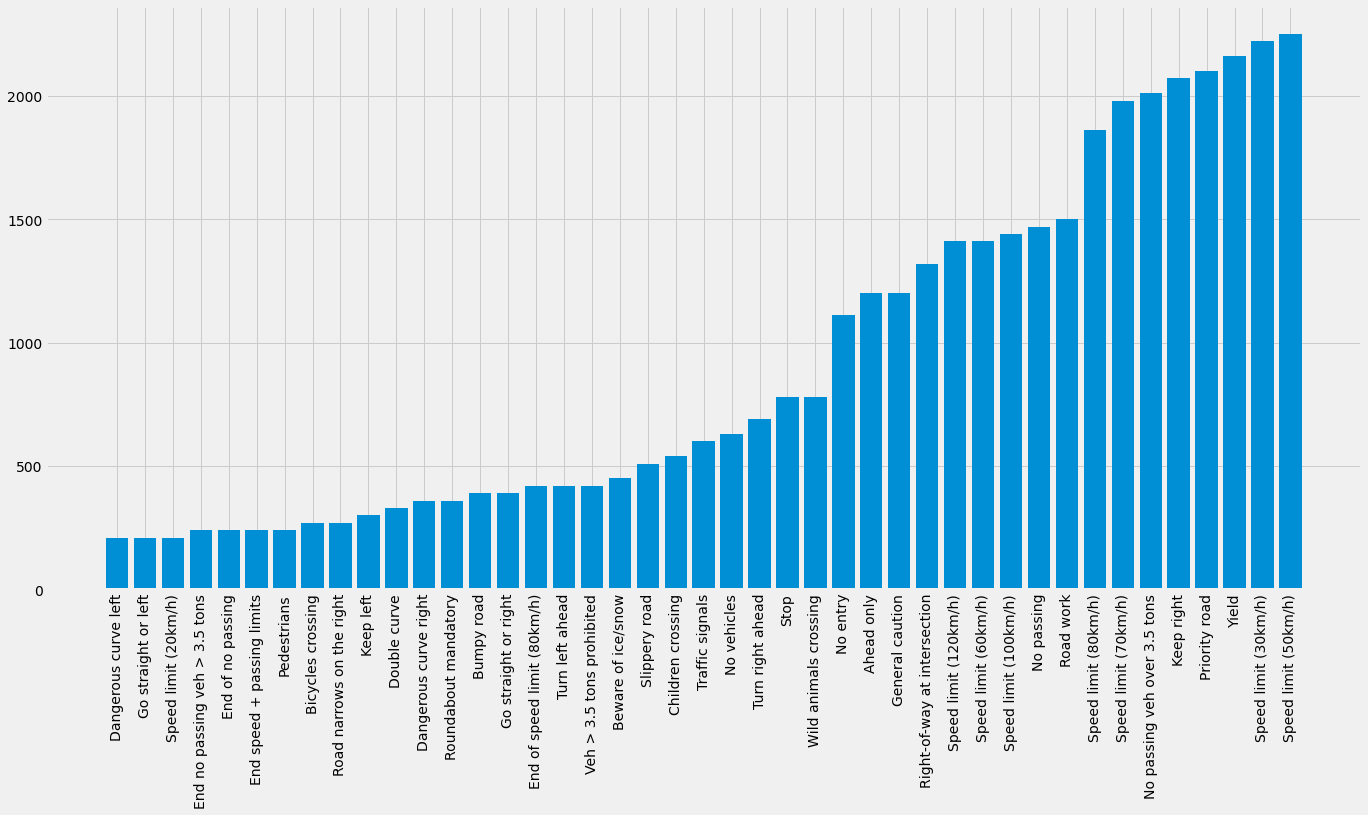

In [13]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

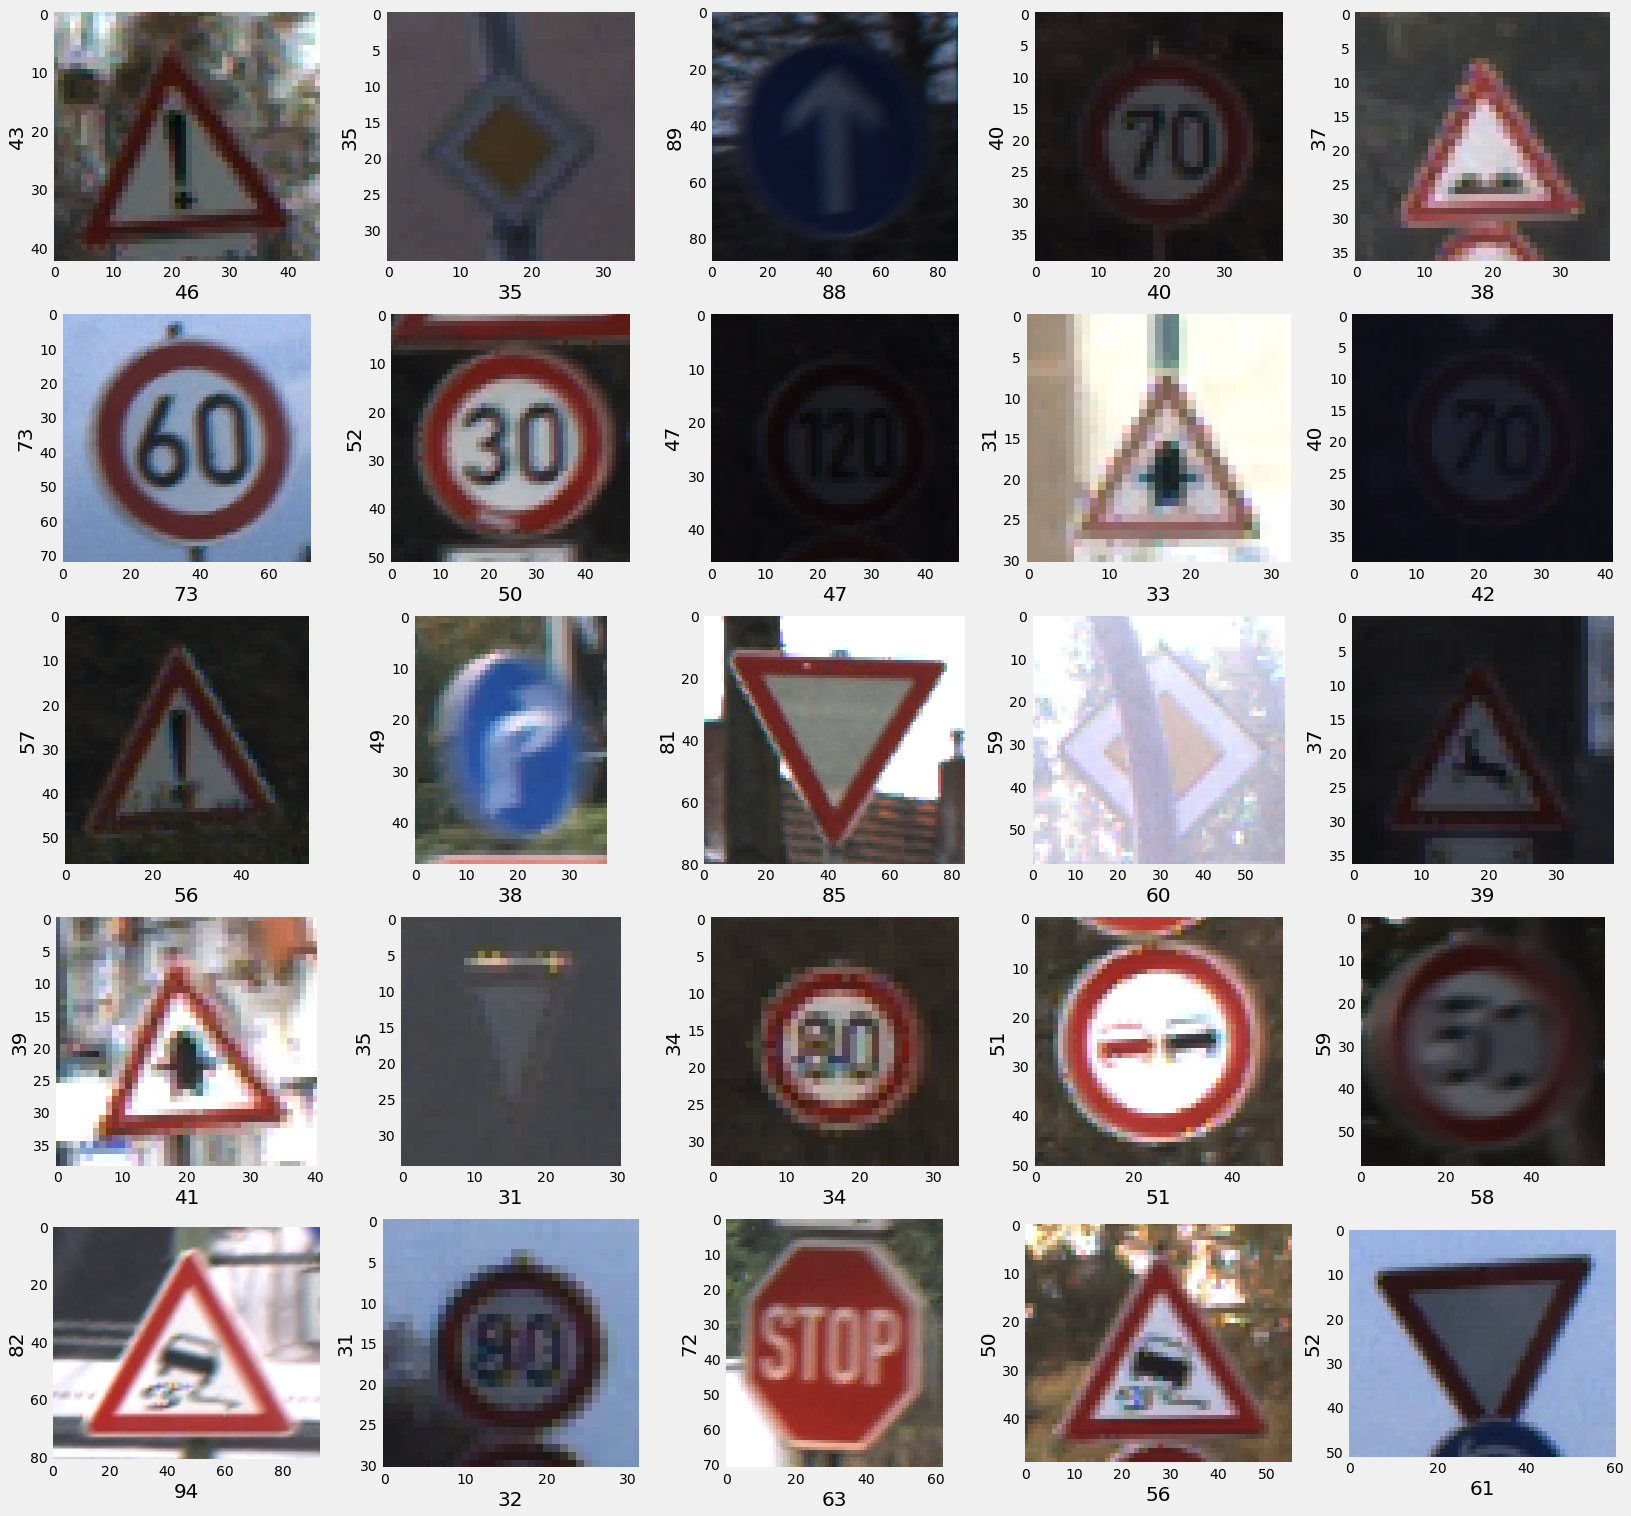

In [14]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [15]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [16]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [17]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [18]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


MODEL CREATION 

In [19]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [20]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [21]:
lr = 0.0001
epochs = 35

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 512)         5

In [23]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/35
858/858 [==============================] - 47s 41ms/step - loss: 1.5446 - accuracy: 0.5971 - val_loss: 0.1870 - val_accuracy: 0.9398
Epoch 2/35
858/858 [==============================] - 35s 41ms/step - loss: 0.3733 - accuracy: 0.8865 - val_loss: 0.0592 - val_accuracy: 0.9819
Epoch 3/35
858/858 [==============================] - 31s 37ms/step - loss: 0.1930 - accuracy: 0.9416 - val_loss: 0.0277 - val_accuracy: 0.9922
Epoch 4/35
858/858 [==============================] - 34s 39ms/step - loss: 0.1140 - accuracy: 0.9659 - val_loss: 0.0179 - val_accuracy: 0.9947
Epoch 5/35
858/858 [==============================] - 34s 40ms/step - loss: 0.0831 - accuracy: 0.9743 - val_loss: 0.0183 - val_accuracy: 0.9936
Epoch 6/35
858/858 [==============================] - 31s 36ms/step - loss: 0.0642 - accuracy: 0.9812 - val_loss: 0.0144 - val_accuracy: 0.9958
Epoch 7/35
858/858 [==============================] - 31s 36ms/step - loss: 0.0522 - accuracy: 0.9835 - val_loss: 0.0133 - val_accuracy:

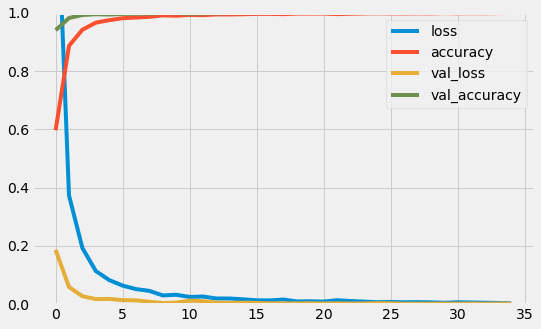

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

#pred = model.predict_classes(X_test)
pred=model.predict(X_test) 
classes_x=np.argmax(pred,axis=1)
#classes_x=np.argmax(predict_x,axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, classes_x)*100)

Test Data accuracy:  98.33729216152018


In [26]:
model.save('modelGTSRB-1.h5')

In [27]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, classes_x)

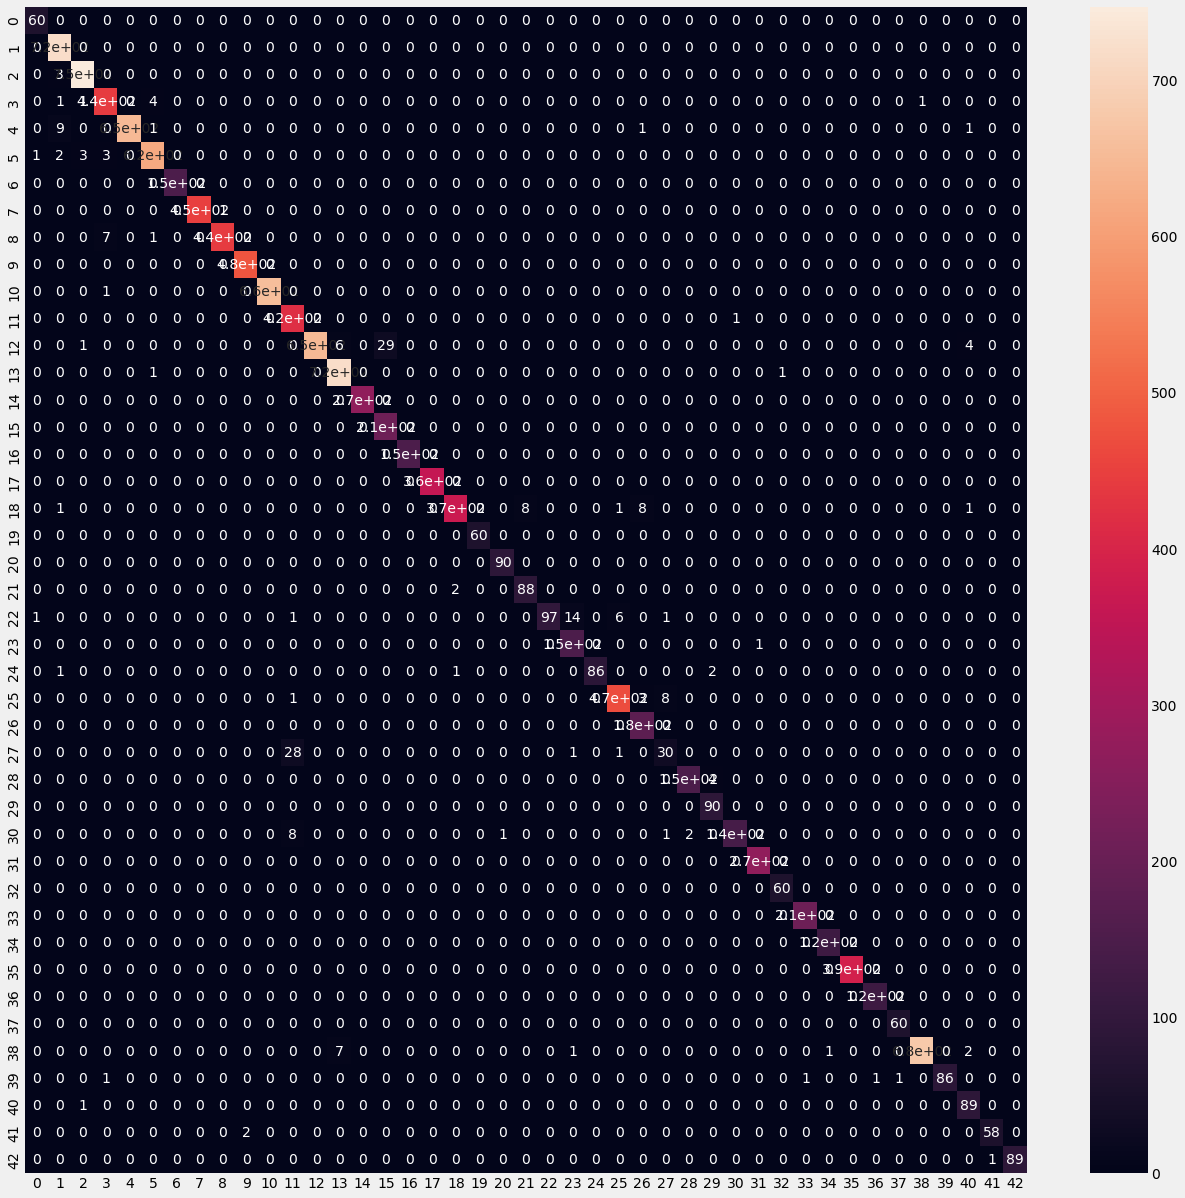

In [28]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

ACCURACY

In [29]:
from sklearn.metrics import classification_report

print(classification_report(labels, classes_x))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.98      1.00      0.99       720
           2       0.99      1.00      0.99       750
           3       0.97      0.98      0.98       450
           4       1.00      0.98      0.99       660
           5       0.99      0.99      0.99       630
           6       1.00      1.00      1.00       150
           7       1.00      1.00      1.00       450
           8       1.00      0.98      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.92      1.00      0.96       420
          12       1.00      0.94      0.97       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.88      1.00      0.94       210
          16       1.00      1.00      1.00       150
          17       1.00    

PREDICTION

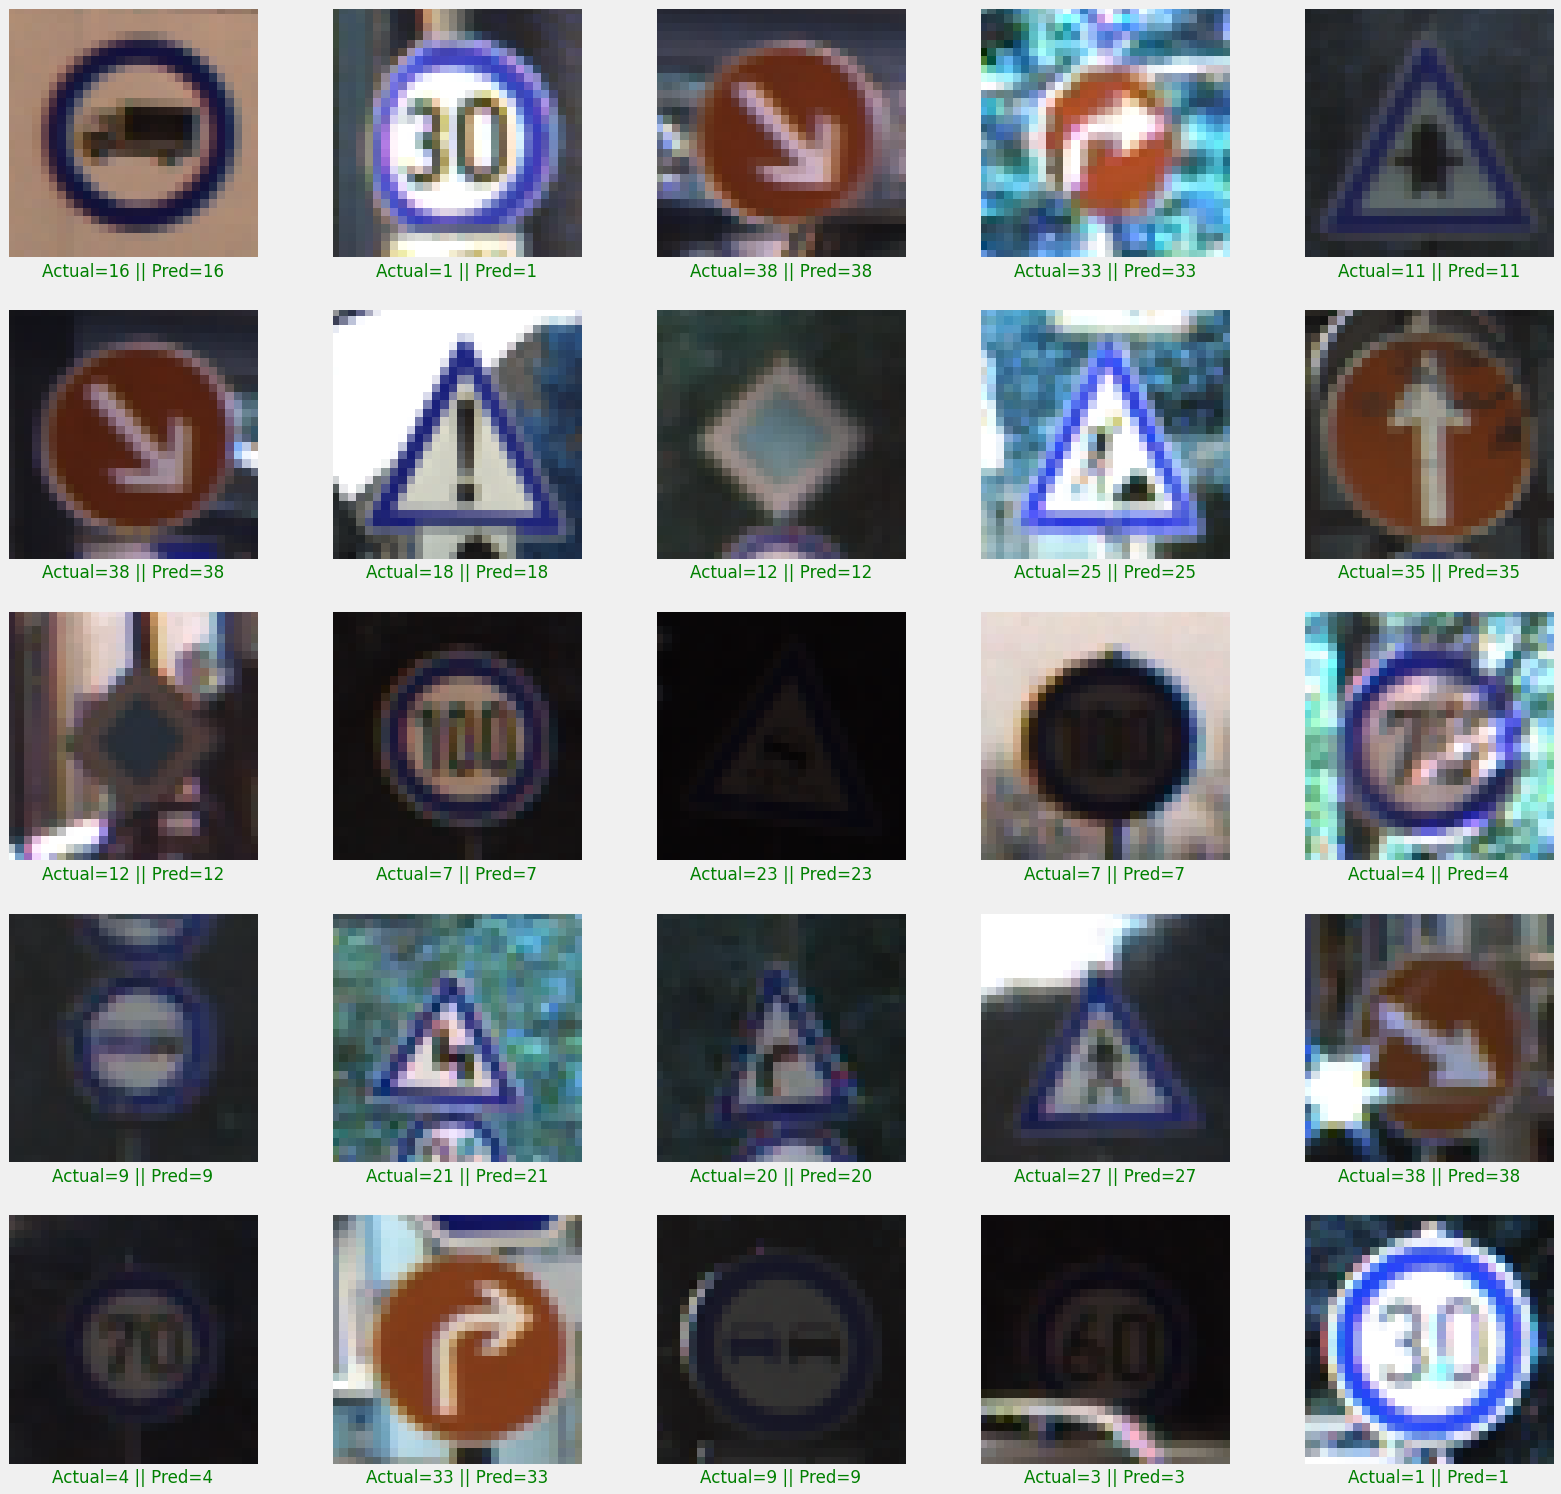

In [30]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()